## Under Sampling with NeighbourhoodCleaningRule Method

The Neighbourhood Cleaning Rule works as follows:

1) Remove noisy observations from the majority class with ENN:
- explores the 3 closest neighbours
- uses majority vote of neighbours to retain observations

2) Remove observations from the majority class if:

- they are 1 of the 3 closest neighbours to a minority sample, and
- most / all of those 3 closest neighbours are not minority, and
- the majority class has at least half as many observations as those in the minority (this can be regulated)

In [176]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for metrics
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import NeighbourhoodCleaningRule

## create simulated data

In [177]:
def create_data(sep):
    
    X,y = make_classification(n_samples=1000,
                              n_features=2,
                              n_redundant=0,
                              n_clusters_per_class=1,
                              weights=[0.99],
                              class_sep=sep,
                              random_state=1)
    
    X = pd.DataFrame(X, columns=['varA','varB'])
    y = pd.Series(y)
    
    return X,y

## resample using OneSidedSelection method

In [178]:
# lets generate data when sep = 2
X,y = create_data(sep=2)

In [179]:
X.shape, y.shape

((1000, 2), (1000,))

In [180]:
y.value_counts()

0    983
1     17
dtype: int64

In [181]:
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                               threshold_cleaning=0.5)      # setting the threshold for the class to be removed
                                                        # here the class should have atleast double obs that of minority one
X_res, y_res = ncr.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(979, 2) (979,)
Value Counts: 
0    962
1     17
dtype: int64


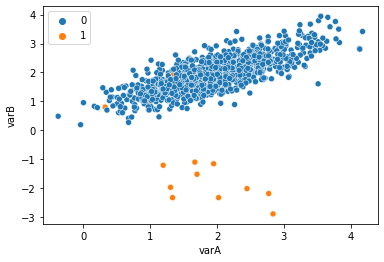

In [100]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

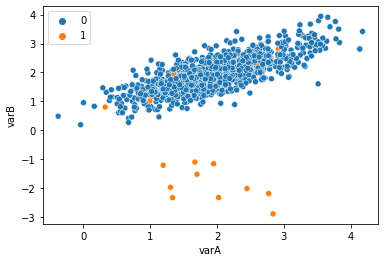

In [182]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- We can see just some obs reduced from the majority class observations.
- Also, we the minority observations which lies in the middle of the majority ones becomes more visible as the near neighbours of the majority observations are removed

## Lets check for a partially separated class

In [183]:
X,y = create_data(sep=0)

In [184]:
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                               threshold_cleaning=0.5)

X_res, y_res = ncr.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(951, 2) (951,)
Value Counts: 
0    934
1     17
dtype: int64


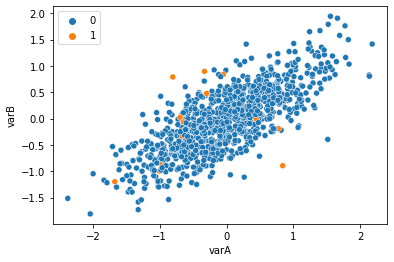

In [144]:
# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.show()

# we can very less separation and much overlapped since we provide a lower seperation value 

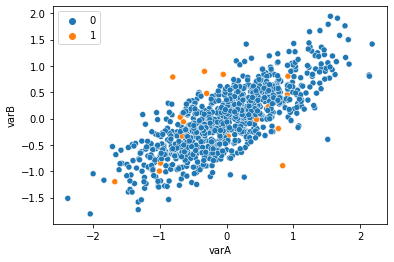

In [185]:
# under sampled data plot
sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
plt.show()

- Here, we can see more number of oberservations of majority class are removed as the observations are closer.

## Different KNN values
### with mode = 'all'

In [186]:
def create_resampled_data(knn,X,y):
    ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=knn,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2, threshold_cleaning=0.5)

    X_res, y_res = ncr.fit_resample(X,y)
    print('Resample Data Shapes for knn = {}'.format(knn))
    print(X_res.shape, y_res.shape)
    print('Value Counts: ')
    print(y_res.value_counts())

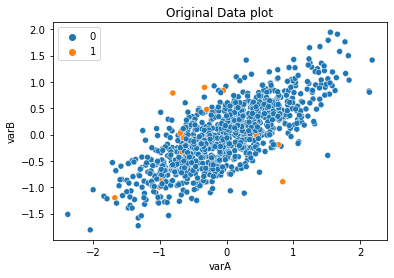

Resample Data Shapes for knn = 1
(973, 2) (973,)
Value Counts: 
0    956
1     17
dtype: int64


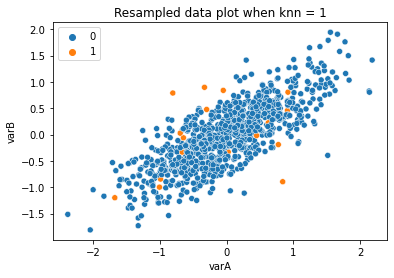

Resample Data Shapes for knn = 2
(967, 2) (967,)
Value Counts: 
0    950
1     17
dtype: int64


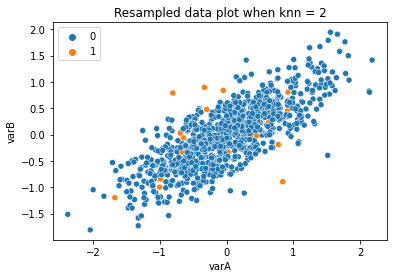

Resample Data Shapes for knn = 3
(951, 2) (951,)
Value Counts: 
0    934
1     17
dtype: int64


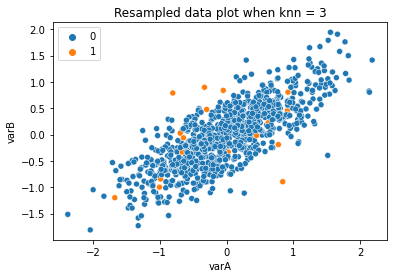

Resample Data Shapes for knn = 4
(938, 2) (938,)
Value Counts: 
0    921
1     17
dtype: int64


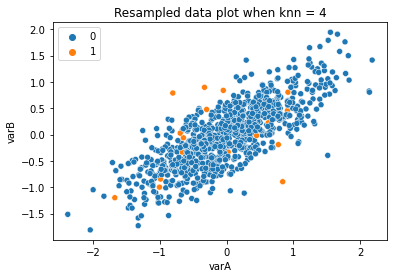

In [187]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled data plot when knn = {}'.format(i))
    plt.show()
    

- We can see the reduction of observations count in the under sampled data is more with higher knn values

### with mode = 'mode'
- When most of the neighbours agree or matched with the observation in check

In [188]:
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='mode',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2, threshold_cleaning=0.5)

X_res, y_res = ncr.fit_resample(X,y)
print('Resample Data Shapes: ')
print(X_res.shape, y_res.shape)
print('Value Counts: ')
print(y_res.value_counts())

Resample Data Shapes: 
(951, 2) (951,)
Value Counts: 
0    934
1     17
dtype: int64


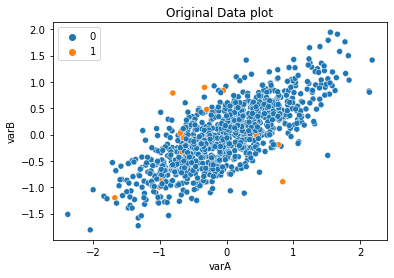

Resample Data Shapes for knn = 1
(973, 2) (973,)
Value Counts: 
0    956
1     17
dtype: int64


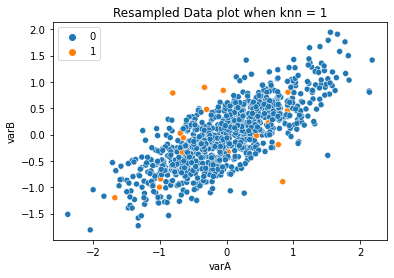

Resample Data Shapes for knn = 2
(967, 2) (967,)
Value Counts: 
0    950
1     17
dtype: int64


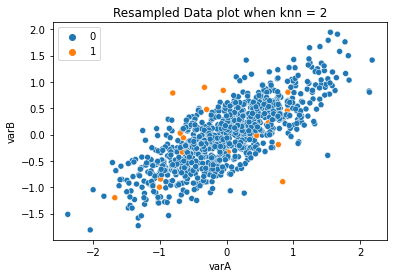

Resample Data Shapes for knn = 3
(951, 2) (951,)
Value Counts: 
0    934
1     17
dtype: int64


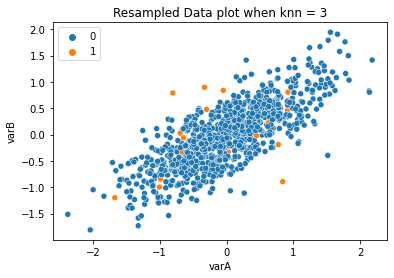

Resample Data Shapes for knn = 4
(938, 2) (938,)
Value Counts: 
0    921
1     17
dtype: int64


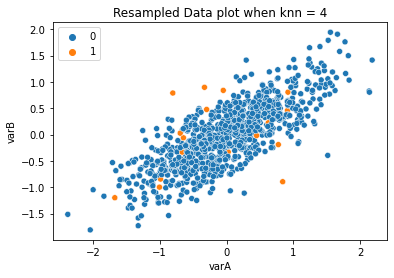

In [189]:
# when sep = 0
X, y = create_data(sep=0)

# original data plot
sns.scatterplot(data=X, x = 'varA', y ='varB', hue=y)
plt.title('Original Data plot')
plt.show()

for i in range(1,5):
    create_resampled_data(i,X,y)    
    # resampled data plot
    sns.scatterplot(data=X_res, x = 'varA', y ='varB', hue=y_res)
    plt.title('Resampled Data plot when knn = {}'.format(i))
    plt.show()
    

- dont see much difference.

## Working on a real data

In [190]:
# sampling to only 10000 observations to speed up the computation
df = pd.read_csv('kdd2004.csv').sample(10000)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
121322,62.40,24.36,0.74,25.0,-14.5,642.8,0.00,-0.79,-13.5,-42.0,...,291.2,0.81,4.90,9.0,-40.0,-34.6,1.62,0.20,0.63,-1
132721,43.67,30.43,0.44,-7.0,-5.0,1118.6,0.33,0.53,9.5,-72.0,...,1109.5,0.30,2.83,12.0,-63.0,675.2,0.21,0.34,0.23,-1
46814,76.32,24.29,0.45,59.5,-21.5,1619.3,-0.65,0.31,16.0,-77.5,...,1017.6,0.66,-1.33,-17.0,-69.0,908.8,0.21,0.11,-0.40,-1
55639,76.19,27.50,1.65,14.0,-9.5,1066.8,-0.79,0.15,4.5,-53.5,...,754.9,1.29,-0.21,6.0,-41.0,236.6,0.67,0.03,-0.01,-1
99442,67.79,23.14,0.72,22.0,50.0,4159.9,0.99,0.44,5.5,-137.0,...,4944.4,-0.68,-1.89,1.0,-161.0,659.8,1.85,0.19,0.22,-1


In [191]:
df.shape

(10000, 75)

In [192]:
# check the target values ratios
df['target'].value_counts()

-1    9911
 1      89
Name: target, dtype: int64

In [193]:
df['target'].value_counts()/len(df)

-1    0.9911
 1    0.0089
Name: target, dtype: float64

## split the data

In [196]:
X_train, X_test, y_train,y_test = train_test_split(df.drop('target', axis = 1),
                                                  df['target'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [197]:
# now lets prepare our under resampled data sets - NCR
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=3,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                               threshold_cleaning=0.5)

X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)
X_ncr.shape, y_ncr.shape

((7000, 74), (7000,))

- No data is removed, we can use another knn value and check

In [198]:
# now lets prepare our under resampled data sets - NCR
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', # removes from the majority class
                              n_neighbors=5,            # setting the nearest neighbours count
                              kind_sel='all',           # removing strategy -- set to all -- all observations must agree
                              n_jobs=2,
                               threshold_cleaning=0.5)

X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)
X_ncr.shape, y_ncr.shape

((7000, 74), (7000,))

- No reduction, so probably there will be no model performance difference for these two datasets